<a href="https://colab.research.google.com/github/gunacodee/DEV/blob/main/Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file created successfully.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sender    4 non-null      object        
 1   category  4 non-null      object        
 2   date      4 non-null      datetime64[ns]
 3   message   4 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 260.0+ bytes
None


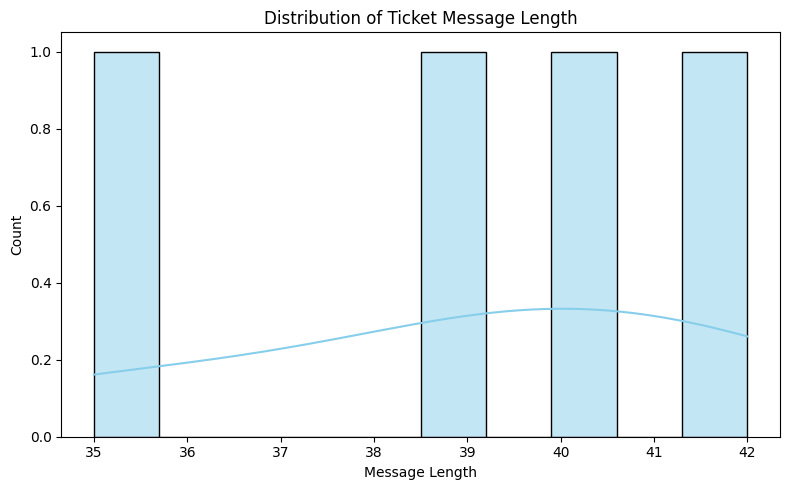

/tmp/ipython-input-2-3617760657.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


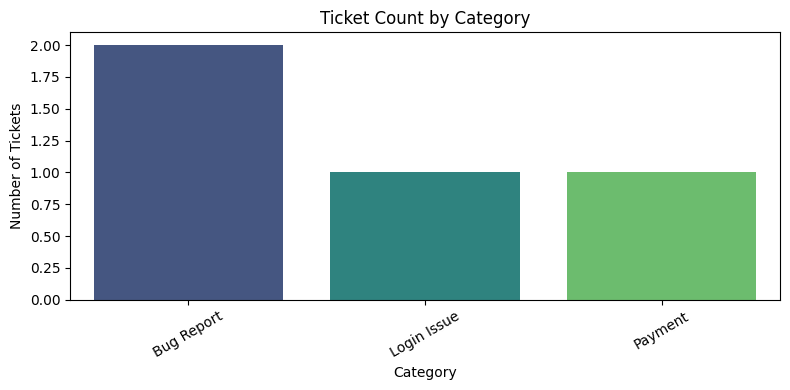

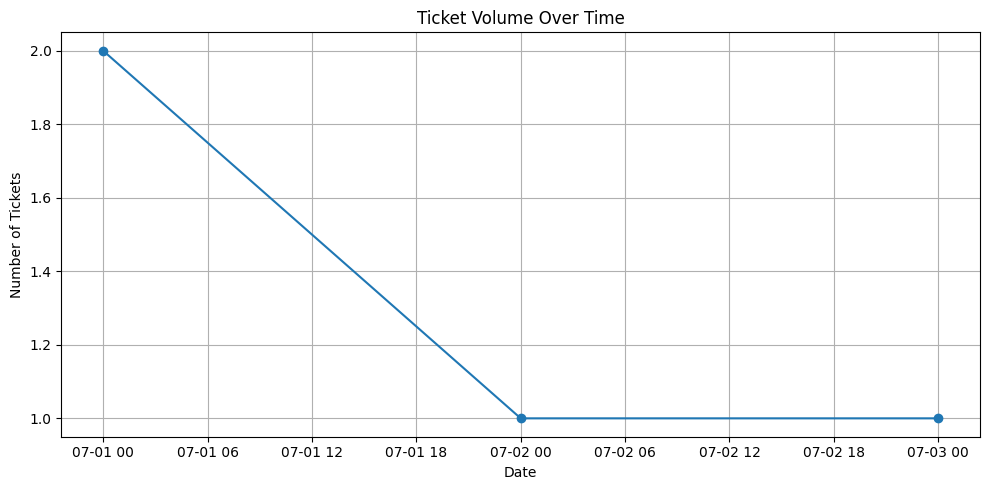

In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Sample Customer Support Ticket Data
data = {
    'sender': ['user1@example.com', 'user2@example.com', 'user3@example.com', 'user1@example.com'],
    'category': ['Login Issue', 'Payment', 'Bug Report', 'Bug Report'],
    'date': ['2023-07-01 08:45:00', '2023-07-01 12:00:00', '2023-07-02 15:30:00', '2023-07-03 09:00:00'],
    'message': [
        'I am unable to log into my account.',
        'I was charged twice for my subscription.',
        'There is a bug in the checkout process.',
        'Still facing issues with the checkout bug.'
    ]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)

# Step 4: Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 5: Save to CSV
df.to_csv("support_tickets.csv", index=False)
print("CSV file created successfully.")

# Step 6: Load CSV
df = pd.read_csv("support_tickets.csv")

# Step 7: Basic Info
df['date'] = pd.to_datetime(df['date'])
print("\nDataFrame Info:")
print(df.info())

# Step 8: Add ticket/message length column
df['message_length'] = df['message'].apply(len)

# Step 9: Distribution of message length
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='message_length', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ticket Message Length')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Step 10: Top Categories
top_categories = df['category'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Ticket Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Step 11: Activity over time (by day)
df['day'] = df['date'].dt.date
activity = df.groupby('day').size()
plt.figure(figsize=(10, 5))
activity.plot(kind='line', marker='o')
plt.title('Ticket Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.tight_layout()
plt.show()
